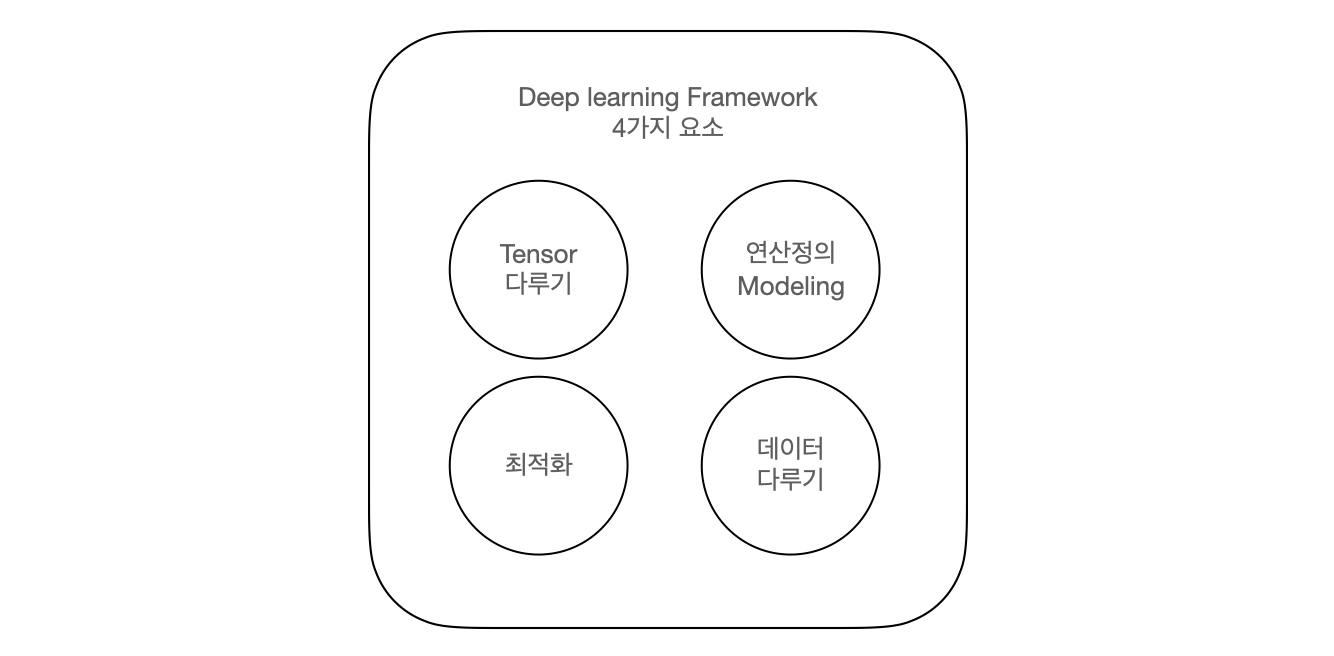

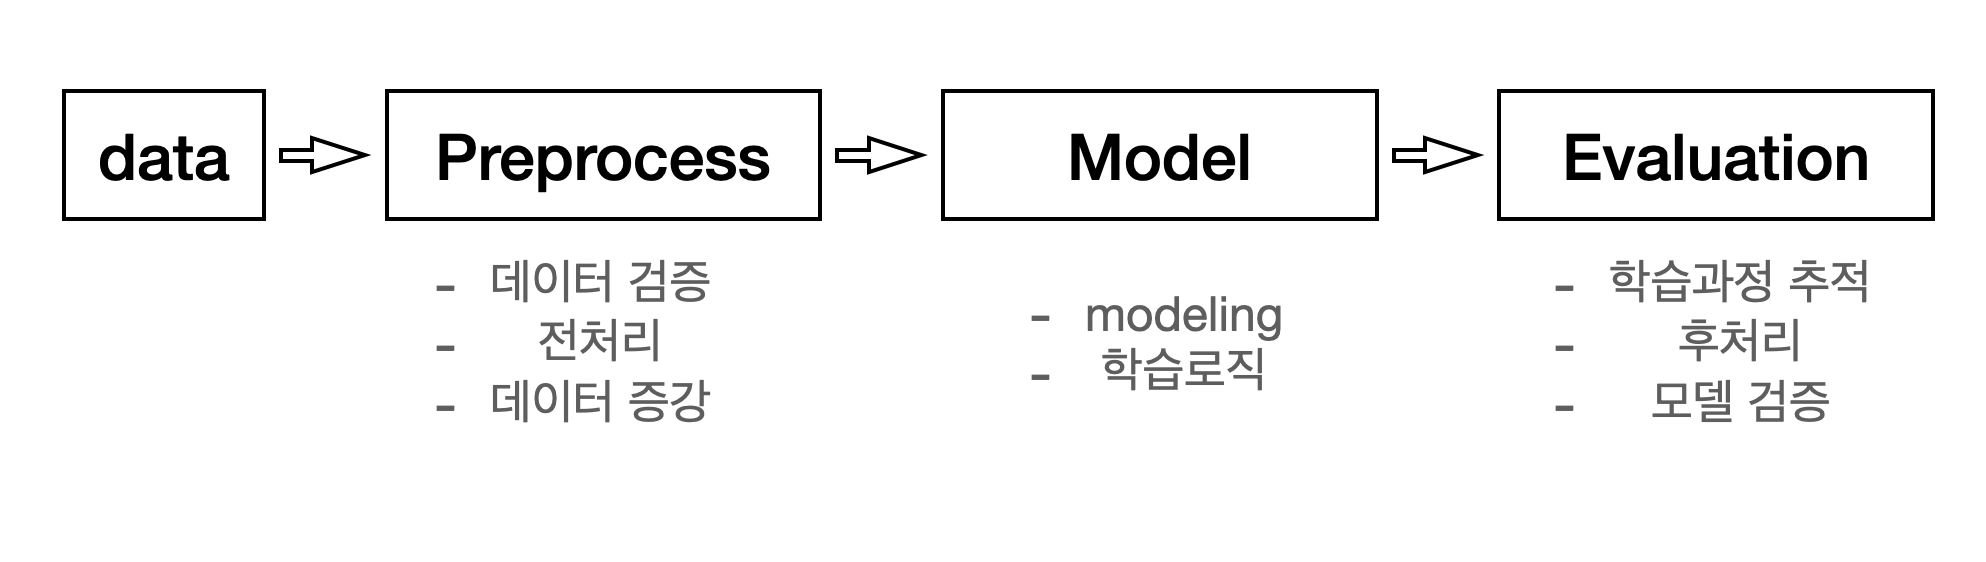

#### 모델을 정의 하는 방법!
1. Sequencial 사용하기 (우리가 지금까지 모델을 만들던 방식)
2. Functional API model
3. Sub class model

## Convolution Neural Network; CNN (VGG19)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
np.random.seed(7777)
tf.random.set_seed(7777)

#### Convolutional Neural Network
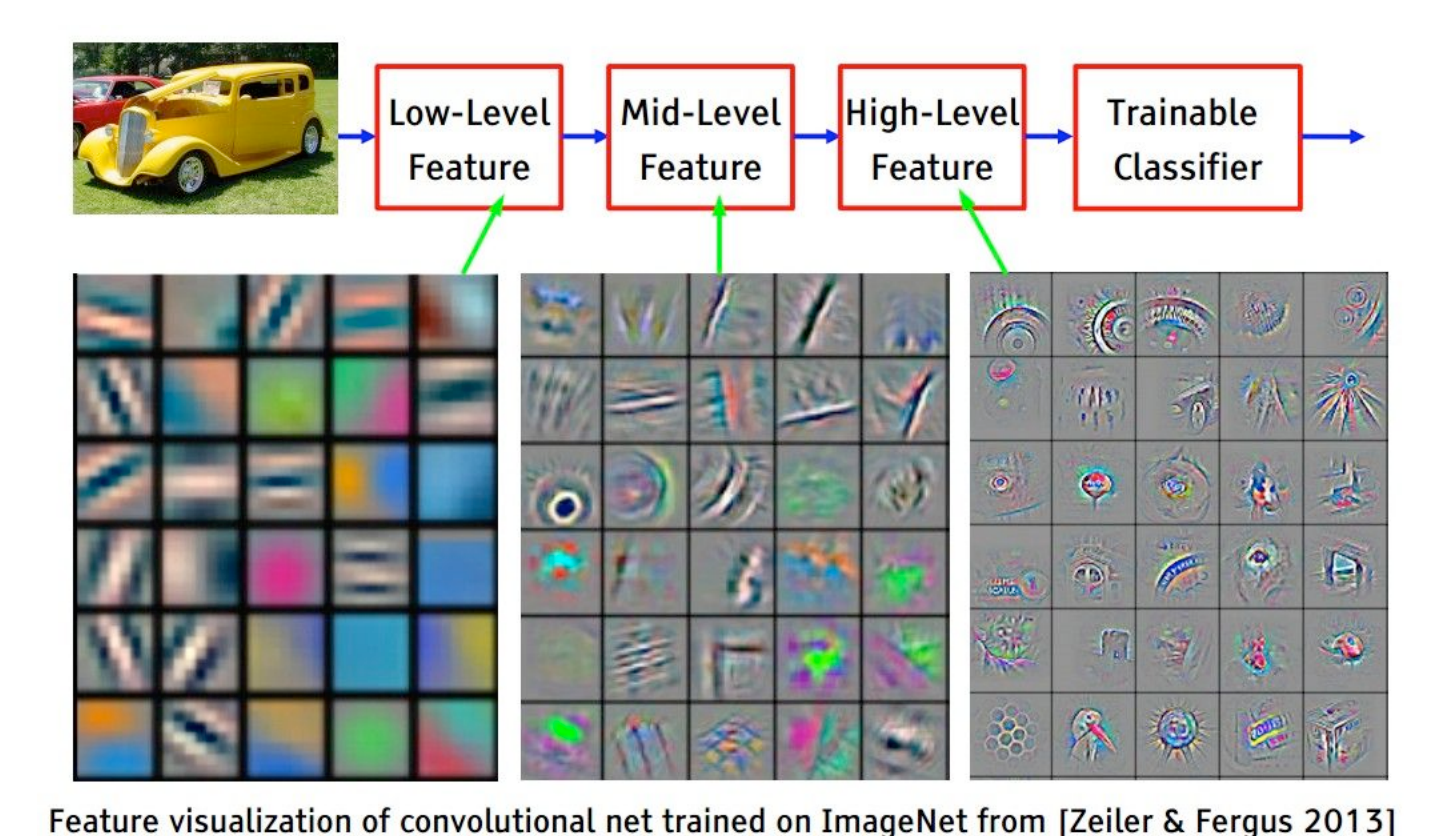

#### Fliter to an image (Convolution layer)
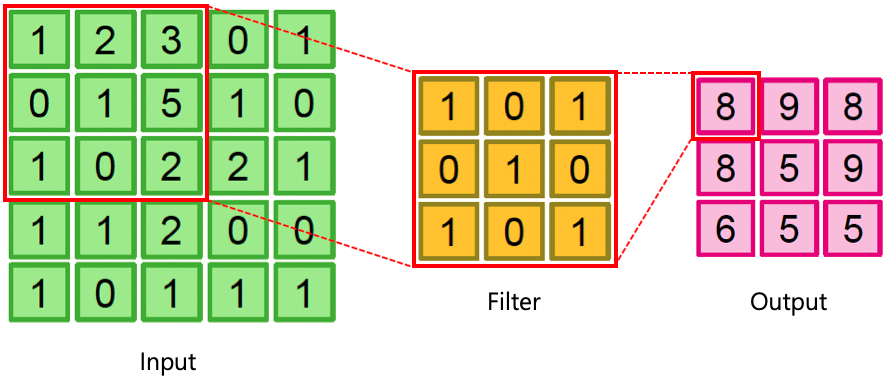

### VGGNet 16

VGGNet은 2014년 lLSVRC에서 비록 다음에 배울 GoogLeNet에 밀려 2위를 했지만, 훨씬 간단한 구조로 이해와 변형이 쉽다는 장점이 있어 많이 응용된 모델이다.

### Dataloader

-  Flatten => 채녈 차원 추가로 변경
    (Convolution Layer는 주로 이미지 데이터 처리를 위해 사용되기 때문에, 컬러이미지는 (height, width, 3) 흑백은 (height, width, 1)로 사용한다.)
        ex) (num_data, 28, 28) => (num_data, 28, 28, 1)

In [6]:
class DataLoader():
    
    def __init__(self):
        (self.train_x, self.train_y),(self.test_x, self.test_y) = tf.keras.datasets.mnist.load_data()
        
    def validate_pixel_scale(self, x):
        return 255 >= x.max() and 0 <= x.min()
    
    def scale(self, x):
        return (x / 255.0).astype(np.float32)
    
    def preprocess_dataset(self, dataset):
        feature, target = dataset
        
        validated_x = np.array([x for x in feature if self.validate_pixel_scale(x)])
        validated_y = np.array([y for x, y in zip(feature, target) if self.validate_pixel_scale(x)])
        
        # scale
        scaled_x = np.array([self.scale(x) for x in validated_x])
        # expand
        expand_x = scaled_x[:, :, :, np.newaxis]
        # label encoding
        ohe_y = np.array([tf.keras.utils.to_categorical(y, num_classes=10) for y in validated_y])
        
        return expand_x, ohe_y
    
    def get_train_dataset(self):
        return self.preprocess_dataset((self.train_x, self.train_y))
    
    def get_test_dataset(self):
        return self.preprocess_dataset((self.test_x, self.test_y))

In [7]:
mnist_loader = DataLoader()

train_x, train_y = mnist_loader.get_train_dataset()

test_x, test_y = mnist_loader.get_train_dataset()

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)
(60000, 10)
(60000, 10)


## VCCNet에서 사용되는 Layer들
- tf.keras.layers.Conv2D
- tf.keras.layers.Activation
- tf.keras.layers.MaxPool2D
- tf.keras.layers.Flatten
- tf.keras.layers.Dense

#### Conv2D

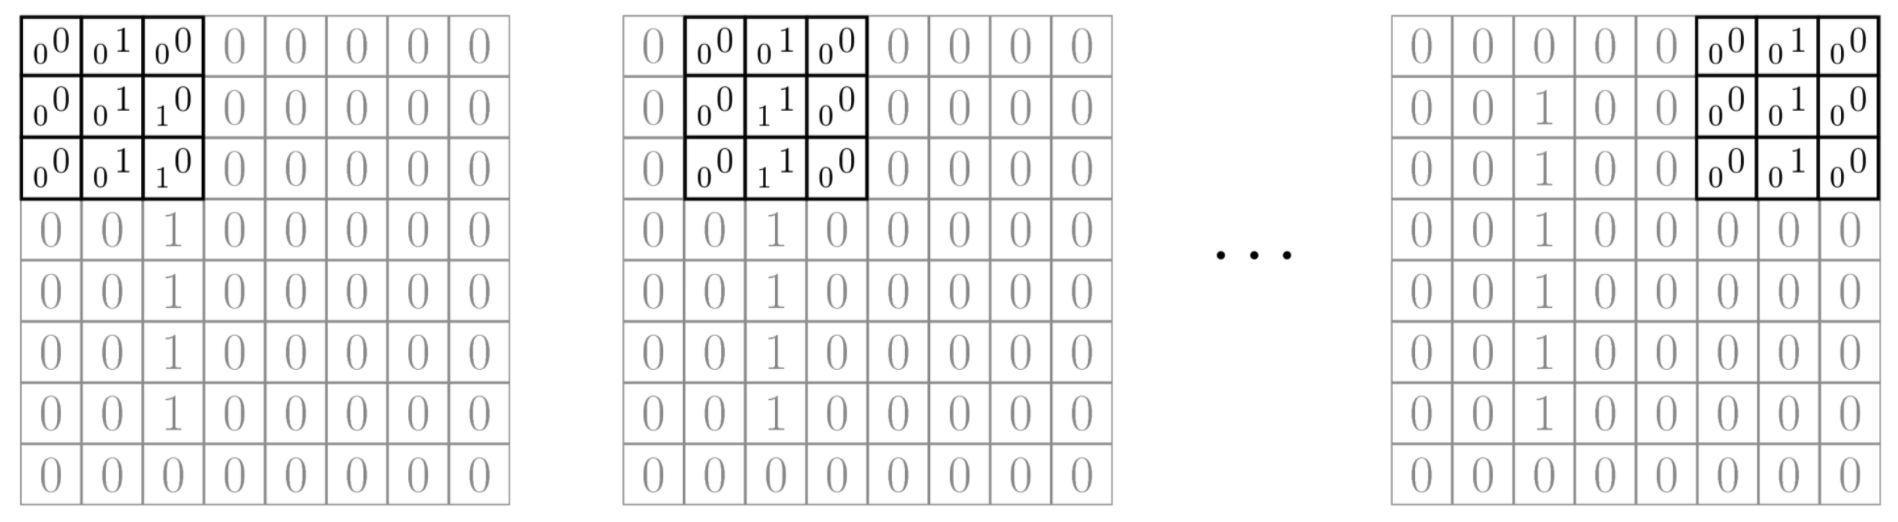

- filters:layer에서 사용할 Fliter(weight)의 갯수
- kernel_size:Fliter(weights)의 사이즈
- strides:몇 개의 pixel을 skip 하면서 훑어지나갈 것인지(출력 피쳐맵의 사이즈에 영향을 줌)
- padding:zero padding을 만들 것인지.VALID는 Padding이 없고, SAME은 Padding이 있음(출력 피쳐맵의 사이즈에 영향을 줌)
- activation:Activation Function을 지정

In [8]:
tf.keras.layers.Conv2D

keras.layers.convolutional.Conv2D

#### MaxPool2D

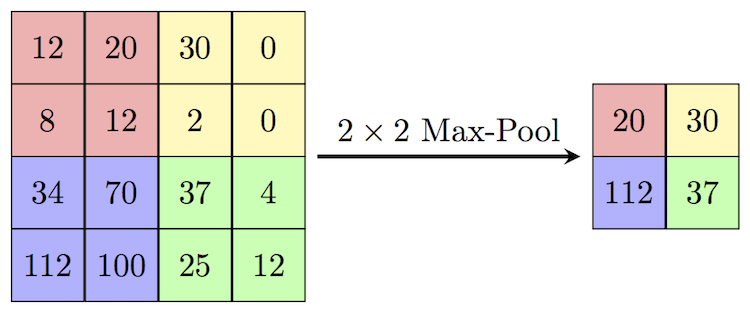

- pool_size:Pooling window 크기
- strides:몇 개의 pixel을 skip하면서 훑어지나갈 것인지
- padding:zero padding을 만들 것인지

In [9]:
tf.keras.layers.MaxPool2D

keras.layers.pooling.MaxPooling2D

#### Flatten

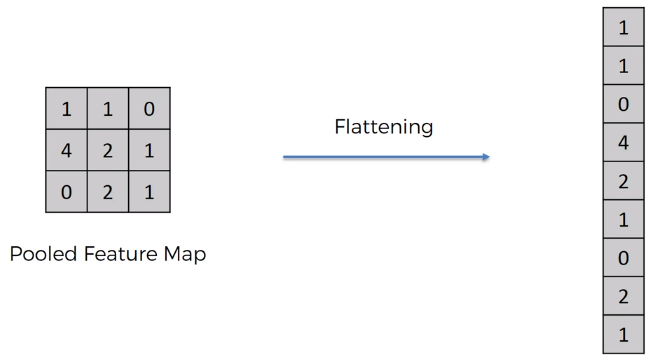

In [10]:
tf.keras.layers.Flatten

keras.layers.core.flatten.Flatten

#### Dense

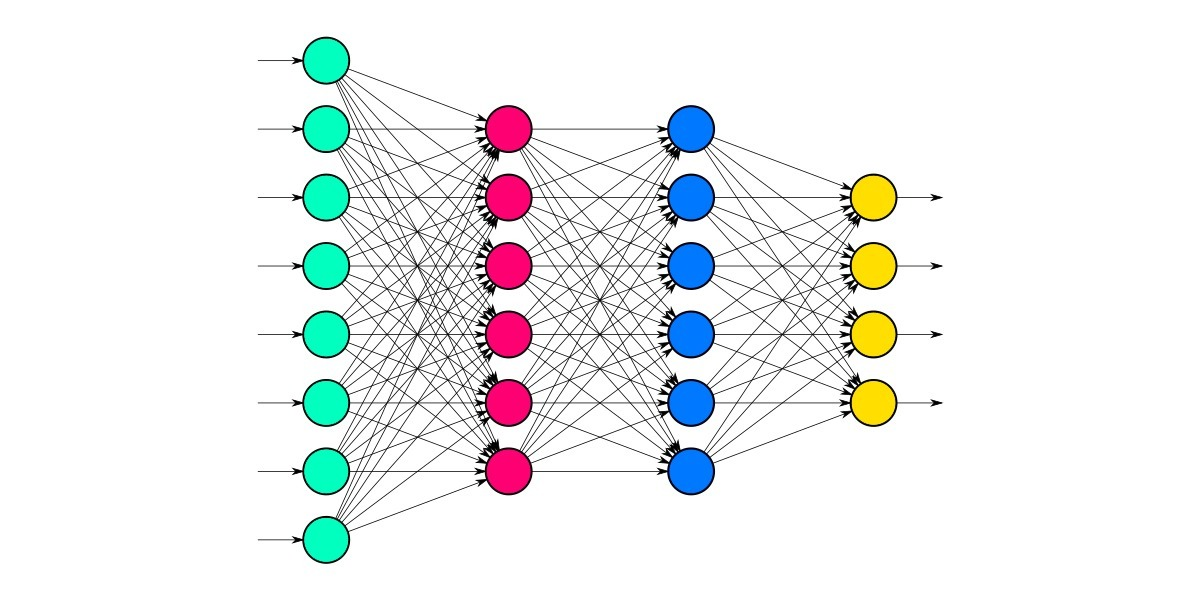

- units:노드 갯수
- activation:활성화 함수
- use_bias: bias를 사용 할 것인지
- kernel_initializer:최초 가중치를 어떻게 세팅 할 것인지
- bias_initializer:최초 bias를 어떻게 세팅 할 것인지

In [11]:
tf.keras.layers.Dense

keras.layers.core.dense.Dense

### Layer들을 이용해 모델 만들기 - Sequencial 방식

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [13]:
model = tf.keras.Sequential()

In [14]:
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [16]:
lr = 0.03
opt = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.categorical_crossentropy

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [18]:
hist = model.fit(train_x, train_y, epochs=2, batch_size=128, validation_data=(test_x, test_y))

Epoch 1/2
469/469 [==============================] - 129s 275ms/step - loss: 2.3031 - accuracy: 0.1099 - val_loss: 2.3016 - val_accuracy: 0.1124
Epoch 2/2
469/469 [==============================] - 126s 269ms/step - loss: 2.3031 - accuracy: 0.1068 - val_loss: 2.3036 - val_accuracy: 0.1124


In [19]:
hist.history

{'loss': [2.303074836730957, 2.3030846118927],
 'accuracy': [0.109866663813591, 0.10681666433811188],
 'val_loss': [2.3016374111175537, 2.3036186695098877],
 'val_accuracy': [0.11236666887998581, 0.11236666887998581]}

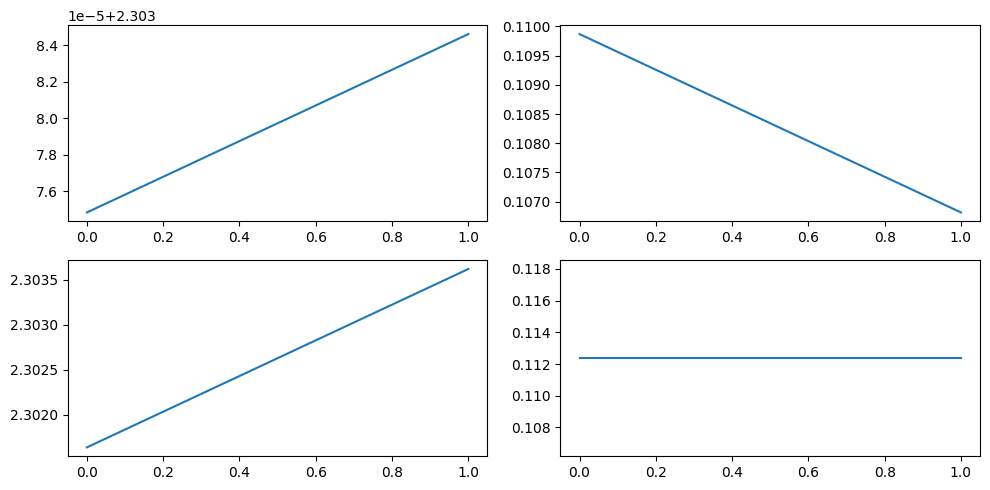

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(hist.history['loss'])
plt.subplot(222)
plt.plot(hist.history['accuracy'])
plt.subplot(223)
plt.plot(hist.history['val_loss'])
plt.subplot(224)
plt.plot(hist.history['val_accuracy'])

plt.tight_layout()
plt.show()